In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv as csv 

import pandas as pd   
import os
from pymcmcstat import propagation as up
from pymcmcstat.MCMC import MCMC
from pymcmcstat.plotting import MCMCPlotting
import pymcmcstat
print(pymcmcstat.__version__)
np.seterr(over='ignore');
from lmfit import  Parameters, Parameter
import json
import covid as cv


1.9.0
1.9.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv as csv 

import pandas as pd   
import os
from pymcmcstat import propagation as up
from pymcmcstat.MCMC import MCMC
from pymcmcstat.plotting import MCMCPlotting
import pymcmcstat
print(pymcmcstat.__version__)
np.seterr(over='ignore');
from lmfit import  Parameters, Parameter
import json
import covid as cv


1.9.0


In [3]:
def import_data(index = 212, start = 4):
    #importing global data
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    confirmed_global = pd.read_csv(url, error_bad_lines=False)
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
    deaths_global = pd.read_csv(url, error_bad_lines=False)
    url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
    recovered_global = pd.read_csv(url, error_bad_lines=False)
    #extract data for Tunisia (or any other country when changing the index)
    #index = 212 # Tunisia's index in the dataset
    #start = 4 #remove the region columns to start from the first date in the dataset
    confirmed = confirmed_global.iloc[index,start:]
    deaths = deaths_global.iloc[index,start:]
    recovered = recovered_global.iloc[index,start:]
    d = {'confirmed': confirmed, 'deaths': deaths,'recovered': recovered}
    d = pd.DataFrame(d)
    d =d[d.confirmed != 0] # removing dates where there are no confirmed cases: dataset starts with the first confirmed case
    d = d.rename_axis('date').reset_index()
    return d

In [4]:
tn = import_data(212,4)
tn

,date,confirmed,deaths,recovered
0,3/4/20,1,0,0
1,3/5/20,1,0,0
2,3/6/20,1,0,0
3,3/7/20,1,0,0
4,3/8/20,2,0,0
5,3/9/20,2,0,0
6,3/10/20,5,0,0
7,3/11/20,7,0,0
8,3/12/20,7,0,0
9,3/13/20,16,0,0


covid.py has predefined functions that we are going to use next for plots and modeling


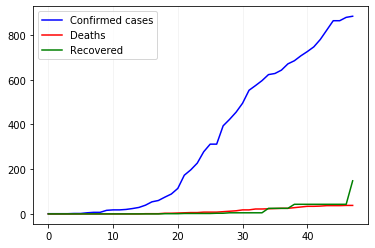

In [5]:
ddata = cv.data(data=tn,t_change=24)#24
ddata.plotData()

The cumulative number of reported symptomatic infectious cases at time t, denoted by $CR(t)$, is assumed to be:

$$ CR(t) = \chi_1 \exp(\chi_2 t) - \chi_3 $$

we fit the parameters and calulate goodness of fit measures

In [6]:
ddata.estimates_goodness()

The CR exponential growth parameters
x1=1.519
x2=0.220
x3=0.757
t0=-3.172
Goodness of fit measures
R2 =  0.9915408024133986
explained variance score 0.9916117601778949
MSE =  34.84102011443714


In [7]:
ddata.regression_report()

   Coefficients  Standard Errors  t values  P-values
0        0.2857            0.083     3.441  0.002225
1        0.2276            0.006    36.796  0.000000


We apply a t-test for the parameters $\chi_1, \chi_2$ and we obtain very small p_values. Hence, we reject H0 that $\chi_1 = 0$ and $\chi_2 =0$.

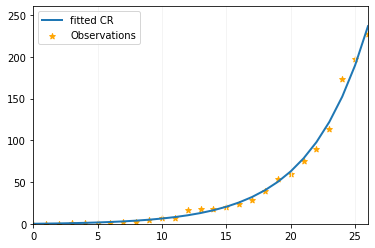

In [8]:
ddata.plot_CR()

Figure: fitted CR vs. real cumulative confimed cases in Tunisia

/home/slimane/biologie/corona/modelSAsymIR/simulation/covid.py:236: RuntimeWarning: divide by zero encountered in log
  log_obs[i] = np.log(obs1[i])


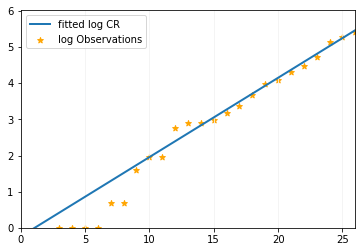

In [9]:
ddata.plot_logCR()    

Figure: fitted $\log(CR(t)+\chi_3)$ vs. real log. of cumulative confimed cases in Tunisia

In [10]:
ddata.preds_CR()

,date,predictions,observations
24,3/28/20,295.104773,278
25,3/29/20,367.786863,312
26,3/30/20,458.324231,312
27,3/31/20,571.103252,394
28,4/1/20,711.587870,423
29,4/2/20,886.584316,455
30,4/3/20,1104.570858,495
31,4/4/20,1376.108559,553
32,4/5/20,1714.352939,574
33,4/6/20,2135.691342,596


Input Covid-19 data

In [11]:
q=1/10 # 5-15 days
deathRate=1/25 # 25 day
ratioMu_gama=np.nanmean(ddata.deaths[18:]/ddata.recovered[18:])

p= ratioMu_gama*q/(deathRate+ratioMu_gama*q)
gama=(1-p)*q
mu1=p*deathRate 
gama1=gama+mu1

p=0.1
mu=p*mu1
gama=(1-p)*mu1+gama


beta=Parameter('beta', value=1/6, min=0,max=1)
tau1=Parameter('tau1', value=0.4, min=0,max=1)
tau2=Parameter('tau2', value=0.778, min=0,max=1)
mu=Parameter('mu', value=mu,  min=0,max=1)
gama=Parameter('gama', value=gama,  min=0,max=1)
alpha1=Parameter('alpha1', value=0.5,  min=0,max=1)
f=Parameter('f', value=3, min=0)
#Parametres liées au confinement
start_conf=Parameter('start_conf', value=np.infty)
efficacite_Conf=Parameter('efficacite_Conf', value= 0.04, min=0,max=1)
confinement_hour=Parameter('confinement_hour',value=12, min=1,max=24)

covidParams = Parameters()
covidParams.add_many(beta,tau1,tau2,mu,gama, alpha1,f,start_conf,efficacite_Conf,confinement_hour)

corona=cv.SAsIQR(beta=covidParams['beta'].value,tau1=covidParams['tau1'].value,tau2=covidParams['tau2'].value,gama=covidParams['gama'].value,
            mu=covidParams['mu'].value,alpha1=covidParams['alpha1'].value,f=covidParams['f'].value,start_conf=covidParams['start_conf'].value,
             efficacite_Conf=covidParams['efficacite_Conf'].value ,confinement_hour=covidParams['confinement_hour'].value)



Calculate initial condition and $\alpha_1$ using method from \cite{Liu2020}

In [12]:
y0,t0,res=corona.calc_params(ddata)

In [13]:
print(corona.alpha1, corona.beta, corona.mu, corona.gama)

4.513222477183226e-08 0.16666666666666666 0.0033771840314839804 0.045965055496256325


Integration data and test

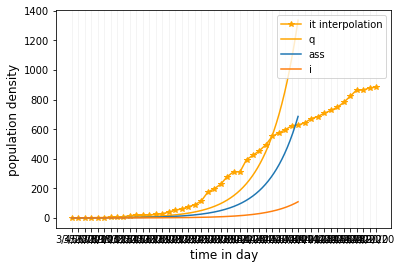

Epidemimiological pic = 34, I+Q=1444, Death num D=22 



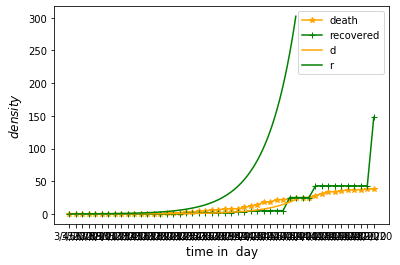

In [14]:
tmax=35#len(ddata.Cases)
dt=float(1./24) # par tranche de 6 h   
timeSet=np.arange(0,tmax,dt) 

corona.calSol(timeSet,y0)
corona.plotSAsQI(ddata,timeSet)

corona.plotRD(ddata,timeSet)

Figure of quarantine 

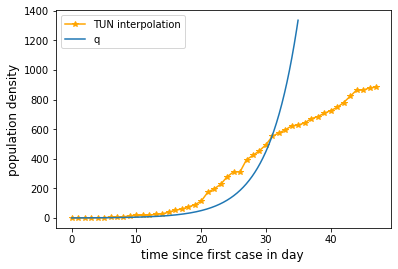

In [15]:
fig, ax = plt.subplots()
   
line1,= plt.plot(np.arange(len(ddata.date)),ddata.confirmed,c='orange',marker='*',label='TUN interpolation')
line2,=ax.plot(timeSet,corona.q,label='q')
 #line3,=ax.plot(timeSet,self.ass,label='ass')
   #  line3,=ax.plot(timeSet,self.i+self.ass,label='i+ass')     
plt.xlabel(r'time since first case in day ',fontsize=12)
plt.ylabel(r"population density",fontsize=12)
 #plt.title()
ax.legend(loc='upper left')
 #plt.savefig('../results/fig111.png', transparent=True)
plt.show()

## Optimization over $\tau1$, $\tau2$ and $p$
we use mcstat pkg

In [16]:
def residual(param,data):
    res=np.zeros(len(data.shape))
    ndp, nbatch = data.shape[0]
    time = data.xdata[0][:,0]
    y1data = data.ydata[0][:, 0] # cases
    y2data = data.ydata[1][:, 0] # death
  #  y3data = data.ydata[2][:, 0] # recovery
    xdata = data.xdata[0][:,0]#data.user_defined_object[0]
    #par=(param[0],param[1],param[2])
    corona.tau1=param[0]
    corona.tau2=param[1]
    
    p=param[2]
    corona.mu=p*mu1
    corona.gama=(1-p)*mu1+gama

    y0,t0,res=corona.calc_params(ddata)
    corona.calSol(time,y0)

    bb=1#param[4]
    ## l'optimisation est sur la base des i+ass+q
    # aa=q[(np.floor(timeSet)==timeSet)*(timeSet<len(ddata.date))]+ass[(np.floor(timeSet)==timeSet)*(timeSet<len(ddata.date))]+i[(np.floor(timeSet)==timeSet)*(timeSet<len(ddata.date))]
      ## l'optimisation est sur la base des i+q
    aa=corona.q#+corona.i
    dd=corona.d
    rr=corona.r
    res[0]= np.linalg.norm(aa-y1data)+np.linalg.norm(dd-y2data)
#    res[1]=np.linalg.norm(dd-y2data)
 #   res[2]=np.linalg.norm(rr-y3data)
    return res


# initialize MCMC object
mcstat = MCMC()

tt=np.arange(len(ddata.date))
mcstat.data.add_data_set(x=tt, y=np.array(ddata.confirmed))#, user_defined_object=ddata.date)
mcstat.data.add_data_set(x=tt, y=np.array(ddata.deaths),weight=0)#, user_defined_object=ddata.date)


# add model parameters
mcstat.parameters.add_model_parameter(name='tau1', theta0=tau1.value, minimum=0,maximum=1, prior_mu=tau1, prior_sigma=0.1)
mcstat.parameters.add_model_parameter(name='tau2', theta0=tau2.value, minimum=0,maximum=1,prior_mu=tau2,prior_sigma=0.01)
mcstat.parameters.add_model_parameter(name='p', theta0=0.2, minimum=0,maximum=1)


# Generate options
mcstat.simulation_options.define_simulation_options(
    nsimu=1.5e+3, updatesigma=True)
# Define model object:
mcstat.model_settings.define_model_settings(
    sos_function=residual)#,
 #   sigma2=0.05**2)#,
   # S20=np.array([1,1]))
   # N0=np.array([4,4,4]))


Sampling these parameters:
      name      start [      min,       max] N(       mu,   sigma^2)
      tau1:      0.40 [ 0.00e+00,      1.00] N(     0.40,     0.10^2)
      tau2:      0.78 [ 0.00e+00,      1.00] N(     0.78, 1.00e-02^2)
         p:      0.20 [ 0.00e+00,      1.00] N( 0.00e+00,      inf)
 [-----------------100%-----------------] 1500 of 1500 complete in 18.1 sec

------------------------------
name      :       mean        std     MC_err        tau     geweke
tau1      :     0.3948     0.0982     0.0100     9.8829     0.9982
tau2      :     0.7782     0.0105     0.0012    10.0536     0.9975
p         :     0.1383     0.1235     0.0173    15.5990     0.3639
------------------------------
Acceptance rate information
---------------
Results dictionary:
Stage 1: 31.80%
Stage 2: 50.53%
Net    : 82.33% -> 1235/1500
---------------
Chain provided:
Net    : 79.20% -> 594/750
---------------
Note, the net acceptance rate from the results dictionary
may be different if you only p

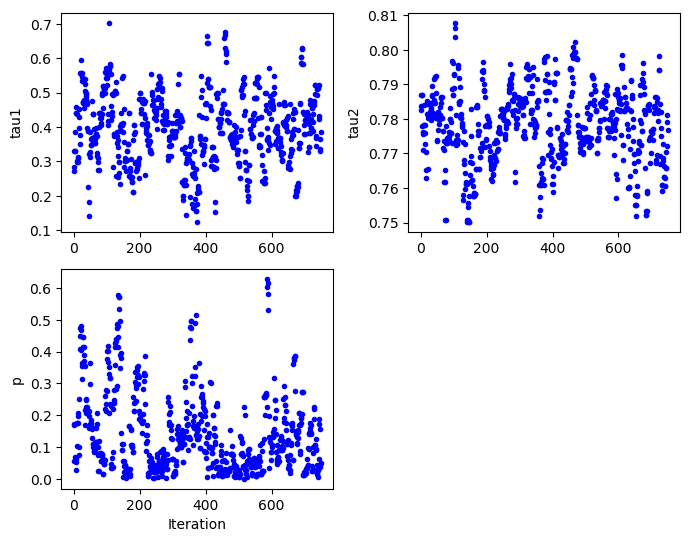

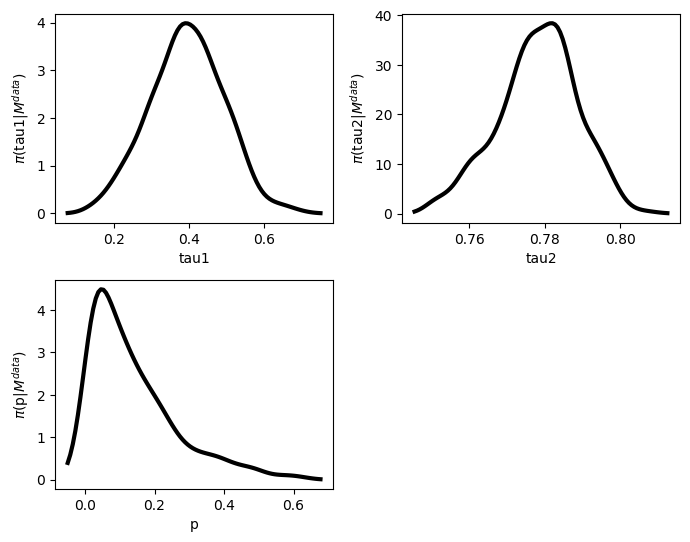

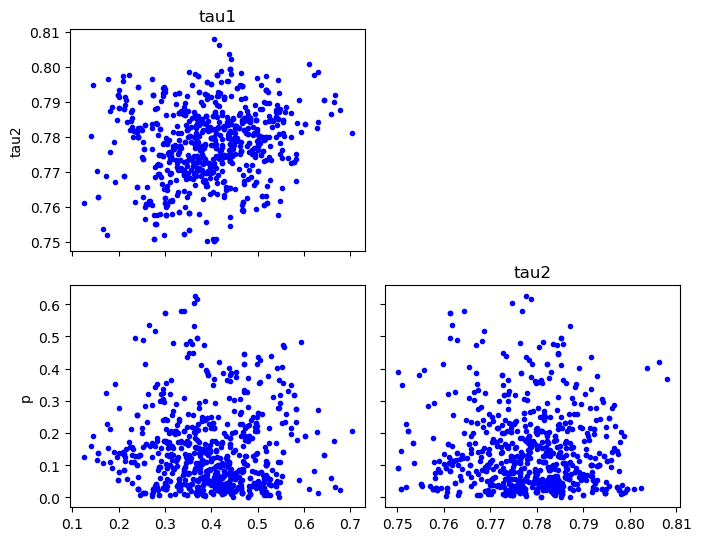

In [17]:
# Run simulation
mcstat.run_simulation()
# Rerun starting from results of previous run
#mcstat.simulation_options.nsimu = int(3e+4)
#mcstat.run_simulation(use_previous_results=True)

# extract info from results
results = mcstat.simulation_results.results
burnin = int(results['nsimu']/2)
chain = results['chain'][burnin:, :]
s2chain = results['s2chain'][burnin:, :]
names = results['names'] # parameter names

# display chain stats
mcstat.chainstats(chain, results)

from pymcmcstat import mcmcplot as mcp
settings = dict(
    fig=dict(figsize=(7, 6))
)
# plot chain panel
mcp.plot_chain_panel(chain, names, settings)
# plot density panel
mcp.plot_density_panel(chain, names, settings)
# pairwise correlation
f = mcp.plot_pairwise_correlation_panel(chain, names, settings)


Generating credible/prediction intervals:

 [-----------------100%-----------------] 500 of 500 complete in 2.1 sec
Interval generation complete



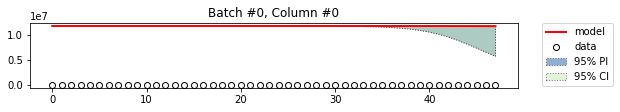

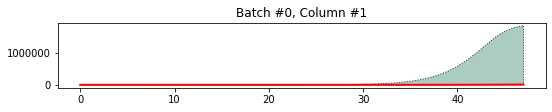

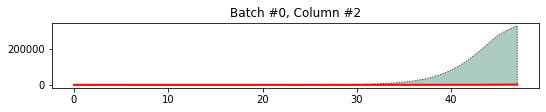

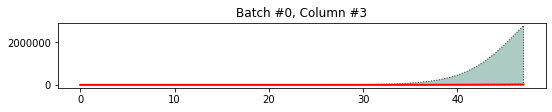

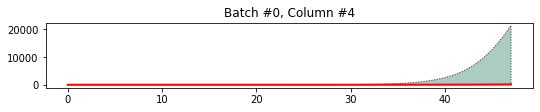

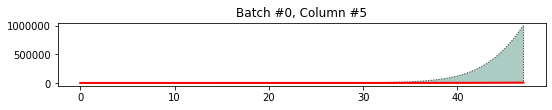

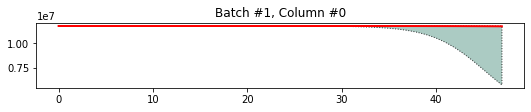

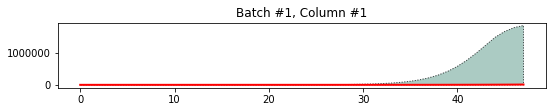

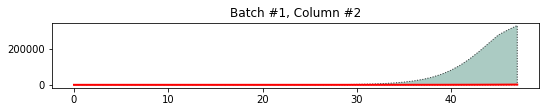

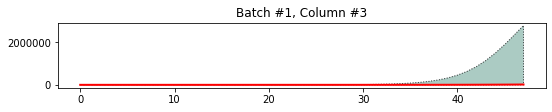

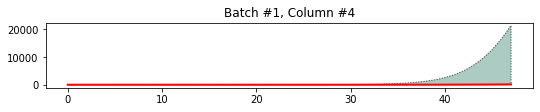

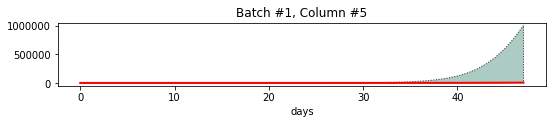

In [18]:




def predmodelfun(data,param):
    obj = data.xdata
    time = obj[0][:,0]
    xdata = obj
    # last 3 parameters are the initial states
    #y0 = np.array(q[-3:])

    corona.tau1=param[0]
    corona.tau2=param[1]
    #corona.efficacite_Conf=param[0]

    # evaluate model
    #ymodel = np.zeros([time.size, 3])
    tmodel, ymodel = corona.calSol(time,y0)
    return ymodel


mcstat.PI.setup_prediction_interval_calculation(
    results=results,
    data=mcstat.data,
    modelfunction=predmodelfun)

mcstat.PI.generate_prediction_intervals(
    nsample=500,
    calc_pred_int=True,
    waitbar=True)


# plot prediction intervals
fighandle, axhandle = mcstat.PI.plot_prediction_intervals(
    adddata=False,
    addlegend=False,
    figsizeinches=[7.5, 8])
for ii in range(1):
    axhandle[ii].plot(mcstat.data.ydata[0][:, 0],
                    #  mcstat.data.ydata[0][:, ii + 1],
                      'ko', mfc='none', label='data')
    axhandle[ii].set_ylabel('')
    #axhandle[ii].set_title(ylbls[ii + 1][0])
    axhandle[ii].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axhandle[-1].set_xlabel('days');




### Figure of sensibility of the model for extreme values of $\tau_1$ and $\tau_2$

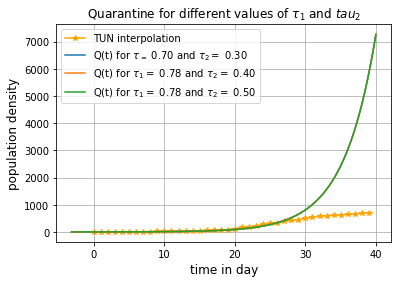

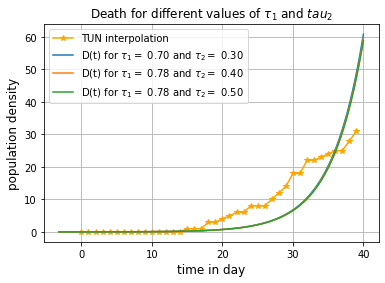

In [19]:
tmax=40
timeSet=np.arange(t0,tmax,dt)

param=[[0.7,0.775,0.78],[0.3,0.4,0.5]]

ressq=[]
ressd=[]

for i in np.arange(np.shape(param)[1]):
    corona.tau1=param[0][i]#0.0 # taux de mise en quarantaine pour les infectes
    corona.tau2=param[1][i]
    
    y0,t0,res=corona.calc_params(ddata)
    
    time,res= corona.calSol(timeSet,y0)
    
    ressq.append(np.array([param[0][i],param[1][i],corona.q]))
    ressd.append(np.array([param[0][i],param[1][i],corona.d]))
    

fig, ax = plt.subplots()
ax.grid(True)
ax.plot(np.arange(len(ddata.date[:tmax])),ddata.confirmed[:tmax],c='orange',marker='*',label='TUN interpolation')

ax.fill_between(timeSet,ressq[2][2],ressq[0][2],alpha=0.2)
ax.plot(timeSet,ressq[0][2],label=r'Q(t) for $\tau_=$ %.2f and $\tau_2=$ %.2f'%(ressq[0][0],ressq[0][1]))
ax.plot(timeSet,ressq[1][2],label=r'Q(t) for $\tau_1=$ %.2f and $\tau_2=$ %.2f'%(ressq[1][0],ressq[1][1]))
ax.plot(timeSet,ressq[2][2],label=r'Q(t) for $\tau_1=$ %.2f and $\tau_2=$ %.2f'%(ressq[2][0],ressq[2][1]))

   
plt.xlabel(r'time in day',fontsize=12)
plt.ylabel(r"population density",fontsize=12)
ax.legend(loc='best')
plt.title(r'Quarantine for different values of $\tau_1$ and $tau_2$')
#plt.savefig('../results/fig111.png', transparent=True)
plt.show()


fig, ax = plt.subplots()
ax.grid(True)
ax.plot(np.arange(len(ddata.date[:tmax])),ddata.deaths[:tmax],c='orange',marker='*',label='TUN interpolation')

ax.fill_between(timeSet,ressd[2][2],ressd[0][2],alpha=0.2)
ax.plot(timeSet,ressd[0][2],label=r'D(t) for $\tau_1=$ %.2f and $\tau_2=$ %.2f'%(ressd[0][0],ressq[0][1]))
ax.plot(timeSet,ressd[1][2],label=r'D(t) for $\tau_1=$ %.2f and $\tau_2=$ %.2f'%(ressd[1][0],ressq[1][1]))
ax.plot(timeSet,ressd[2][2],label=r'D(t) for $\tau_1=$ %.2f and $\tau_2=$ %.2f'%(ressd[2][0],ressq[2][1]))

plt.xlabel(r'time in day',fontsize=12)
plt.ylabel(r"population density",fontsize=12)
plt.title(r'Death for different values of $\tau_1$ and $tau_2$')
ax.legend(loc='best')
#plt.savefig('../results/fig111.png', transparent=True)
plt.show()



## Optimizing the parameters of the curfew

### Update covid-19 parameters

In [20]:
covidParams['tau1'].value=0.778
covidParams['tau2'].value=0.14
covidParams['start_conf'].value=27#28.7
covidParams['efficacite_Conf'].value=0.11#.03

corona1=cv.SAsIQR(beta=covidParams['beta'].value,tau1=covidParams['tau1'].value,tau2=covidParams['tau2'].value,gama=covidParams['gama'].value,
            mu=covidParams['mu'].value,alpha1=covidParams['alpha1'].value,f=covidParams['f'].value,start_conf=covidParams['start_conf'].value,
             efficacite_Conf=covidParams['efficacite_Conf'].value ,confinement_hour=covidParams['confinement_hour'].value)



y0,t0,res=corona1.calc_params(ddata)


#### Optimization when curfew and containement

First periode (no curfew nor containment)

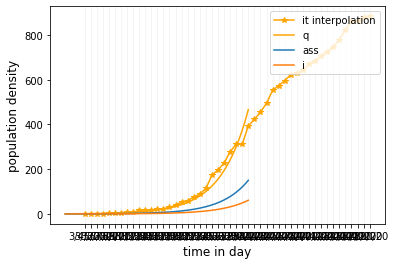

Epidemimiological pic = 26, I+Q=527, Death num D=8 



In [21]:
timeSet1=np.arange(t0,start_conf.value,dt)  

time1 , res1=corona1.calSol(timeSet1,y0)
corona1.plotSAsQI(ddata,timeSet1)

# evaluate the death number
dd=int(np.max(corona1.d))*np.ones(4)

Second periode (curfew and containment)

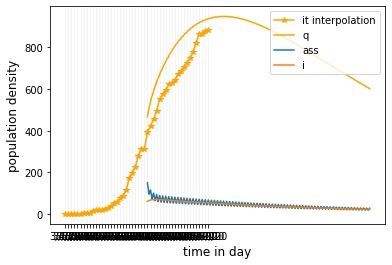

Epidemimiological pic = 51, I+Q=999, Death num D=218 



In [22]:
tmaxPerd2=100
timeSet2=np.arange(np.max(timeSet1),tmaxPerd2,dt)
  
ass0=corona1.ass[-1]
i0= corona1.i[-1]
q0=corona1.q[-1]
d0=corona1.d[-1]
r0=corona1.r[-1]
s0=ddata.population-(ass0+i0+q0+d0+r0)#1.-(ass0+i0+q0+d0+r0) #if s<0.2 else 0

y0=[s0,ass0,i0,q0,d0,r0]

corona2=cv.SAsIQR(beta=covidParams['beta'].value,tau1=covidParams['tau1'].value,tau2=covidParams['tau2'].value,gama=covidParams['gama'].value,
            mu=covidParams['mu'].value,alpha1=covidParams['alpha1'].value,f=covidParams['f'].value,start_conf=covidParams['start_conf'].value,
             efficacite_Conf=covidParams['efficacite_Conf'].value ,confinement_hour=covidParams['confinement_hour'].value)

corona2.calc_params(ddata)

time2 , res2=corona2.calSol(timeSet2,y0)

corona2.plotSAsQI(ddata,time2)
# incremental the number of death
dd[0]+=int(max(corona2.d))

Figure of the solution for the both periods

NameError: name 'resSR' is not defined

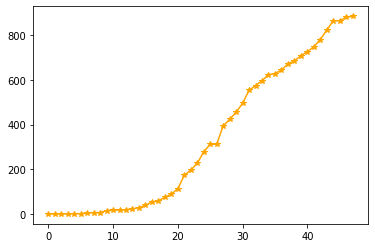

In [23]:
fig, ax = plt.subplots()
ax.plot(np.arange(len(ddata.date)),ddata.confirmed,label='TUN data',marker='*',c='orange')
ax.plot(time,resSR[3],c='r',label='Q, 12h of curfews and containment.\n Death num.='+str(int(dd[0])))

plt.axvline(time[(time<19+dt) * (time>19)], color='black', linestyle='-.', alpha=.5)
plt.axvline(time[(time<24+dt) * (time>24)], color='black', linestyle='-.', alpha=.5)

plt.text(16, 800, '6PM-6AM curfew ',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
          size=10)

plt.text(28, 800, 'containment',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
          size=10)

plt.xlabel('Days since first case',fontsize=10)
plt.ylabel(r"Q(t)",fontsize=10)
plt.title(r'Declared asymptomatic  and sympotomatic' )
ax.legend(loc='upper right',fontsize=9)
        #plt.savefig('../results/fig112.png', transparent=True)
plt.show()

        

Plot of the undeclared cases (asymptomatics and undeclared infected)

In [ ]:
fig, ax = plt.subplots()
ax.plot(time,resSR[1],c='r',label='Ass, 12h of curfews and containment.\n Death num.='+str(int(dd[0])))
ax.plot(time,resSR[2],c='b',label='I, 12h of curfews and containment.\n Death num.='+str(int(dd[0])))



ax.axvline(time[(time<19+dt) * (time>19)], color='black', linestyle='-.', alpha=.5)
ax.axvline(time[(time<24+dt) * (time>24)], color='black', linestyle='-.', alpha=.5)

ax.text(16, 80, '6PM-6AM curfew ',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
          size=10)

ax.text(28, 80, 'containment',
         rotation=90,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center',
          size=10)

plt.xlabel('Days since first case',fontsize=10)
plt.ylabel(r"Q(t)",fontsize=10)
plt.title(r'Undeclared asymptomatic  and sympotomatic' )
ax.legend(loc='best',fontsize=9)
        #plt.savefig('../results/fig112.png', transparent=True)
plt.show()

Figure of the ratio declared vs undeclared asymptomatic + sympotomatic 

In [ ]:
aa= (resSR[1]+resSR[2])/resSR[3]
 
fig, ax = plt.subplots()
ax.plot(time,aa.rolling(120).mean())
plt.xlabel('Days since first case',fontsize=10)
plt.ylabel(r"(As+I)/Q",fontsize=10)
plt.title('Ratio  undeclared asymptomatic \n and sympotomatic vs declared  ' )
#ax.legend(loc='upper right',fontsize=9)
        #plt.savefig('../results/fig112.png', transparent=True)
plt.show()

## Saving model  parameters to a file

In [ ]:
#with open('covidParam.txt', 'w') as fd:
#      covidParams.dump(fd)
